<a href="https://colab.research.google.com/github/linashmyak/MLL/blob/main/ML3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Метод опорных векторов

Цель работы

Изучить работу метода опорных векторов для решения задач классификации и регрессии, познакомиться с основными особенностями и вариациями данного метода. Изучить соответствующие классы библиотеки sklearn, их параметры и атрибуты, применимые на практике.

Содержание работы

- Сгенерируйте линейно разделимый датасет для классификации из двух признаков Постройте на нем опорно-векторный классификатор без ядра с параметром С=100. Изобразите границу принятия решения и линию зазора на графике.
- Сгенерируйте линейно неразделимый датасет с зазором между классами. Повторите виуальный анализ на нем.
- Сгенерируйте неразделимый датасет так, чтобы классы пересекались. Повторите построение и оценку метода опорных векторов на нем.

Методические указания

Метод опорных векторов SVM (Support Vector Machines) — это алгоритм машинного обучения, используемый для решения задач классификации, регрессии и обнаружения выбросов.

Рассмотрим подробно SVM для метода бинарной классификации (разделеня на два класса) в случае линейно разделимых и линейно неразделимых классов.



# Линейно разделимые данные

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
from sklearn.datasets import make_circles

In [ ]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)

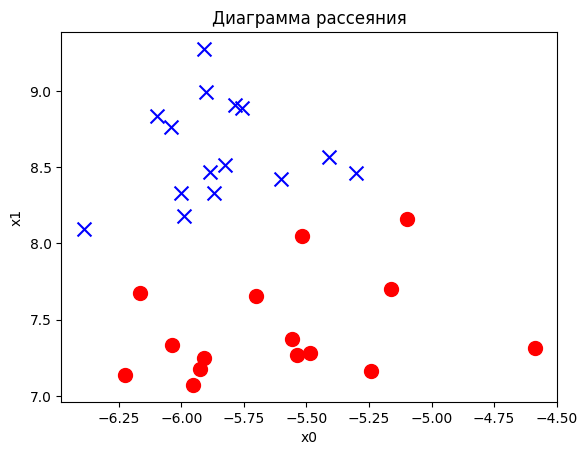

In [ ]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

In [ ]:
svm_linear = SVC(kernel='linear', C=100)
svm_linear.fit(X, y)

SVC(C=100, kernel='linear')

In [ ]:
svm_linear.coef_

array([[-2.49920793,  6.14683189]])

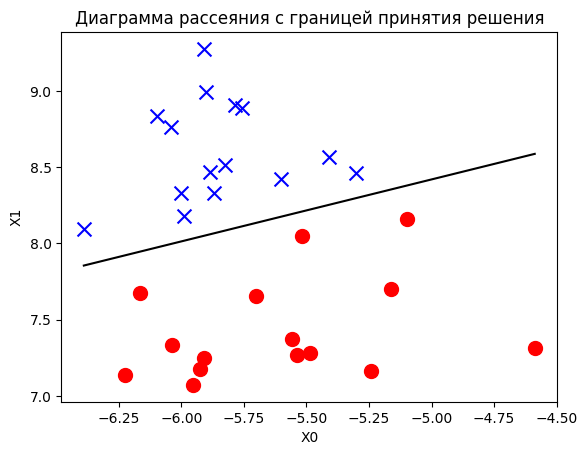

In [ ]:
X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])

plt.plot(X0,-svm_linear.intercept_[0]/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0, c='k')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c границей принятия решения")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [ ]:
svm_linear.support_vectors_ #так можно вывести самии координаты опорных векторов


array([[-5.51629264,  8.04763857],
       [-5.30025769,  8.46071981],
       [-5.9879581 ,  8.18112559]])

In [ ]:
svm_linear.support_ #так посмотреть индексы опорных векторов в исходном наборе данных


array([ 0,  8, 29], dtype=int32)

In [ ]:
svm_linear.n_support_ #так узнать количество опорных векторов

array([1, 2], dtype=int32)

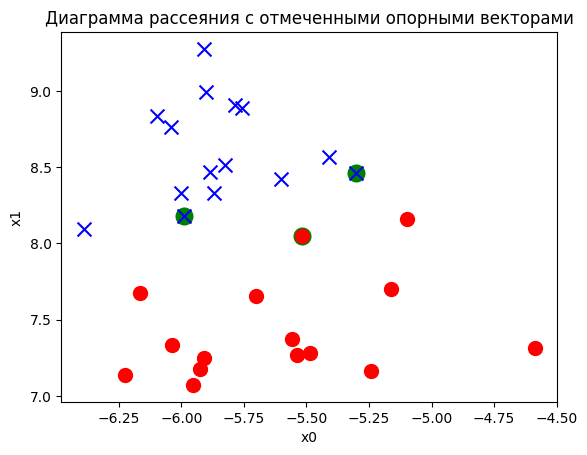

In [ ]:
plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c отмеченными опорными векторами")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

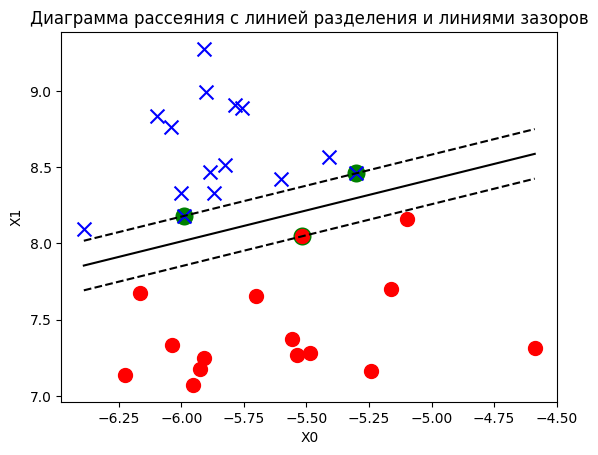

In [ ]:
plt.plot(X0,-svm_linear.intercept_[0]/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0, c='k')

plt.plot(X0,(-svm_linear.intercept_[0]-1)/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0,linestyle='--', c='k')
plt.plot(X0,(-svm_linear.intercept_[0]+1)/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0,linestyle='--', c='k')

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения и линиями зазоров")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

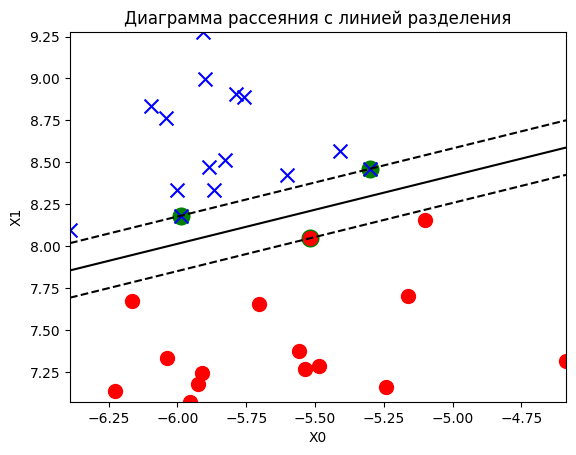

In [ ]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), X.shape[0])
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)
Z = svm_linear.intercept_[0] + svm_linear.coef_[0][0] * X0_grid +  svm_linear.coef_[0][1] * X1_grid
plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [ ]:
def plot_decision_regions(X, y, model):
    plt.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1], linewidth=7, facecolors='green')

    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

    X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])
    X1 = np.linspace(X[:, 1].min(),X[:, 1].max(), X.shape[0])

    X0_grid, X1_grid = np.meshgrid(X0, X1)
    Z = model.decision_function(np.array([X0_grid.ravel(), X1_grid.ravel()]).T).reshape(X0_grid.shape)
    plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    plt.contourf(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)

    plt.title("Диаграмма рассеяния c линией разделения и зазором")
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.show()

In [ ]:
y_pred =  svm_linear.predict(X)
metrics.accuracy_score(y, y_pred)

1.0

In [ ]:
metrics.confusion_matrix(y, y_pred)

array([[15,  0],
       [ 0, 15]])

In [ ]:
observation_new = [[-5.25, 9.4]]

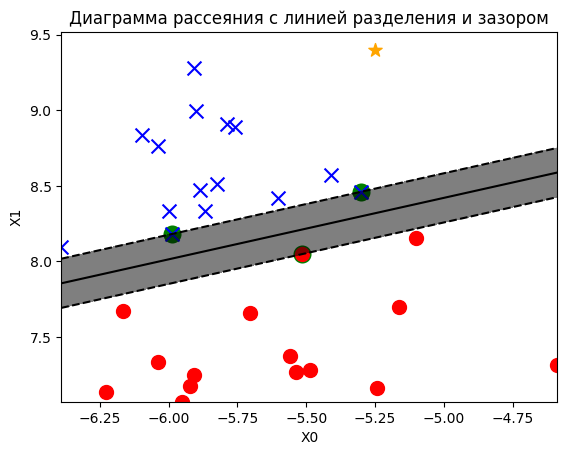

In [ ]:
plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)

In [ ]:
svm_linear.decision_function(observation_new)


array([6.64766263])

In [ ]:
svm_linear.predict(observation_new)

array([1])

# Линейно неразделимые данные с зазором

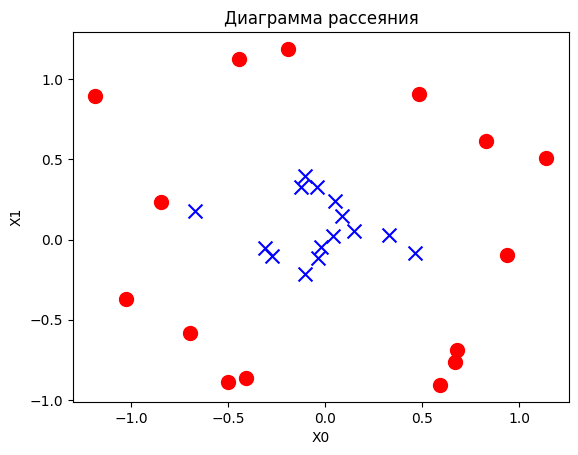

In [ ]:
X, y = make_circles(n_samples=30, random_state=5, factor=.1, noise=.2)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

## Ядро RBF

In [ ]:
svm_rbf = SVC(kernel='rbf', C=100).fit(X, y)

In [ ]:
svm_rbf.n_support_

array([6, 2], dtype=int32)

In [ ]:
svm_rbf.support_

array([11, 20, 21, 23, 28, 29, 25, 27], dtype=int32)

In [ ]:

svm_rbf.support_vectors_

array([[ 0.9388294 , -0.09554628],
       [-0.84682371,  0.23287306],
       [-0.19166925,  1.18895776],
       [-0.69539045, -0.58523359],
       [ 0.68060508, -0.68615145],
       [ 0.48354792,  0.91063288],
       [-0.66975235,  0.17866445],
       [ 0.46427295, -0.08540628]])

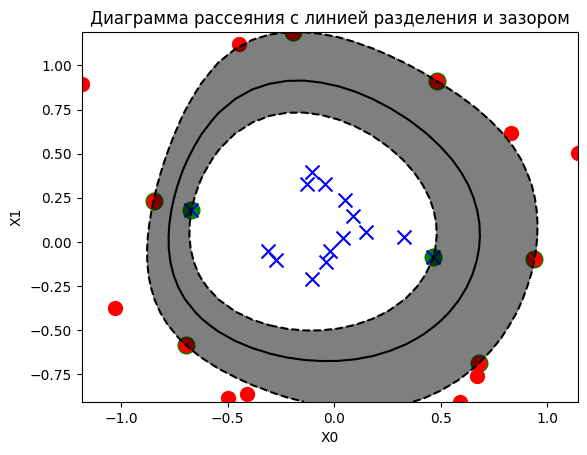

In [ ]:
plot_decision_regions(X, y, svm_rbf)

In [ ]:
metrics.accuracy_score(y, y_pred)
metrics.confusion_matrix(y, y_pred)

array([[7, 8],
       [8, 7]])

## Ядро SIGMOID

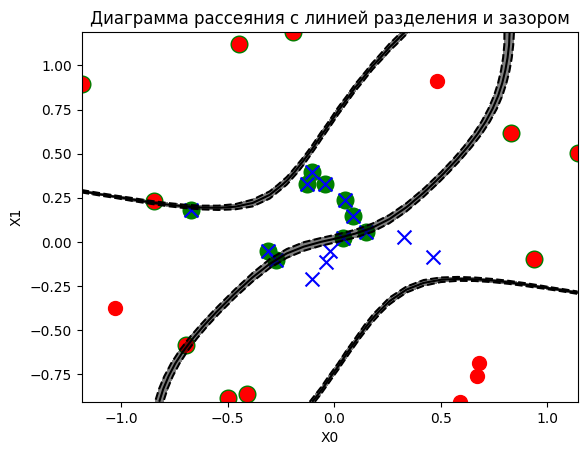

In [ ]:
svm_sigmoid = SVC(kernel='sigmoid', C=50).fit(X, y)
plot_decision_regions(X, y, svm_sigmoid)

## Ядро Poly

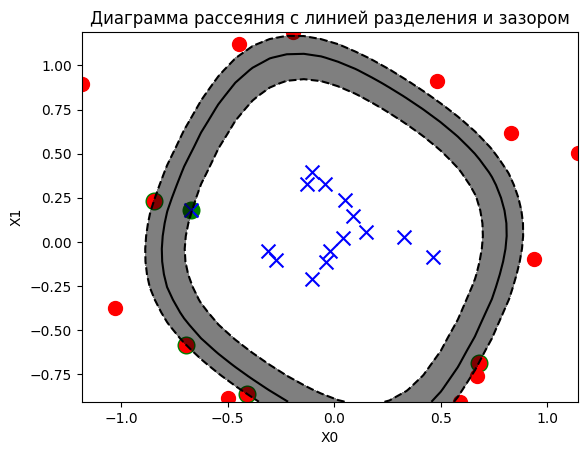

In [ ]:
svm_poly = SVC(kernel='poly',degree=4, C=100).fit(X, y)
plot_decision_regions(X, y, svm_poly)

# Данные без зазора

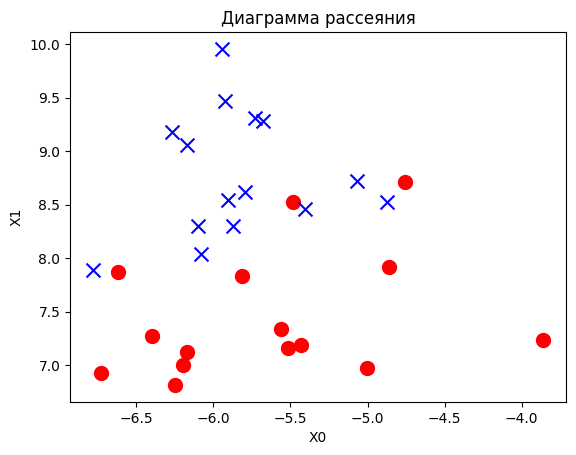

In [ ]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [ ]:
svm_poly = SVC(kernel='poly', degree=4, C=100).fit(X, y)

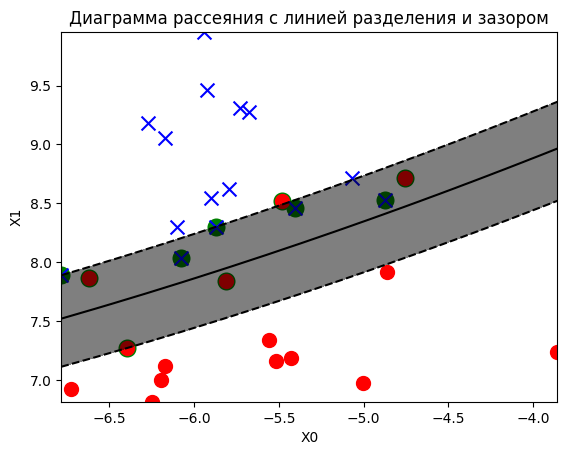

In [ ]:
plot_decision_regions(X, y, svm_poly)

In [ ]:
svm_poly.n_support_

array([5, 5], dtype=int32)

In [ ]:
metrics.accuracy_score(y, y_pred)
metrics.confusion_matrix(y, y_pred)

array([[15,  0],
       [ 0, 15]])

# В третьем задании примените классификатор без ядра. Познакомьтесь и примените класс Linear_SVC.

In [ ]:
def plot_linear_svc(X, y, model): # визуал для svc linear
    plt.figure(figsize=(6, 6))
    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], c='red', label='Class 0', s=100, marker='o')
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], c='blue', label='Class 1', s=100, marker='x')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1])
    yy = -(model.coef_[0][0] * xx + model.intercept_[0]) / model.coef_[0][1]

    plt.plot(xx, yy, 'k-')
    plt.show()

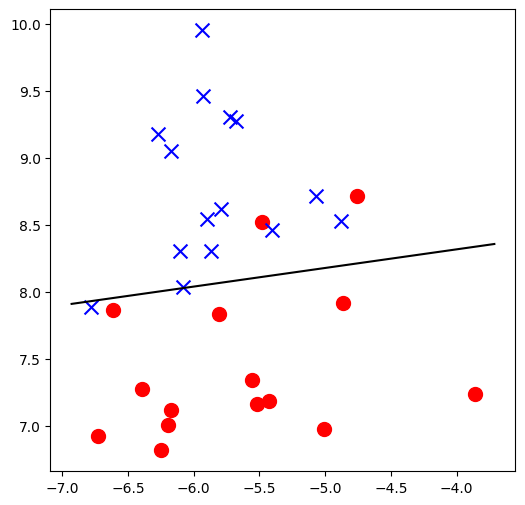

In [ ]:
from sklearn.svm import LinearSVC
Lin_SVC = LinearSVC(C=10)

Lin_SVC.fit(X, y)

y_pred = Lin_SVC.predict(X)
plot_linear_svc(X, y, Lin_SVC)

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split



# Сгенерируйте датасет для классификации из 1000 точек и 5 атрибутов. Попробуйте применить метод опорных векторов на нем. Найдите методом подбора наилучшее ядро и значение С.

In [ ]:
X, y = make_classification(
    n_samples=1000,
    n_features=5,
    n_informative=3,
    n_redundant=0,
    n_classes=2,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

Try_rbf = SVC(kernel='rbf', C=10).fit(X_train[:, :2], y_train)


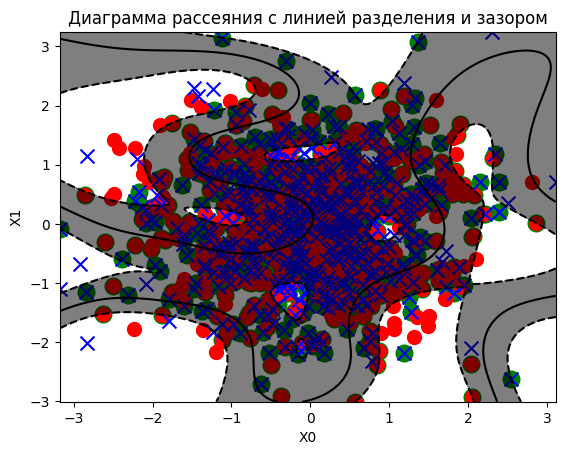

In [ ]:
plot_decision_regions(X, y, Try_rbf)

In [ ]:
Try_Poly = SVC(kernel='poly', C=1).fit(X_train[:, :2], y_train)

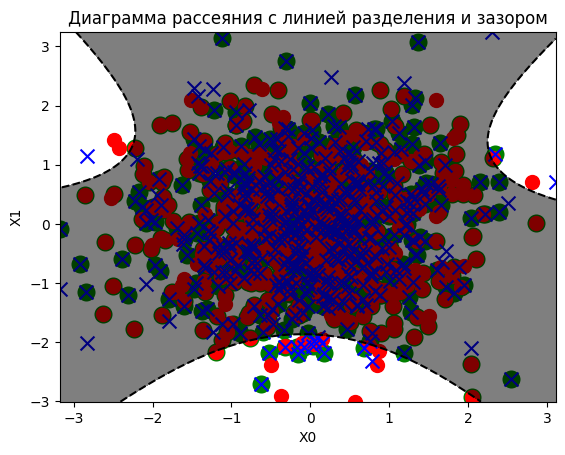

In [ ]:
plot_decision_regions(X, y, Try_Poly)

# Примените метод опорных векторов для задачи множественной классификации. Самостоятельно сгенерируйте визуализируемый датасет для этой задачи. Поробуйте изобразить границу принятия решений и зазор.

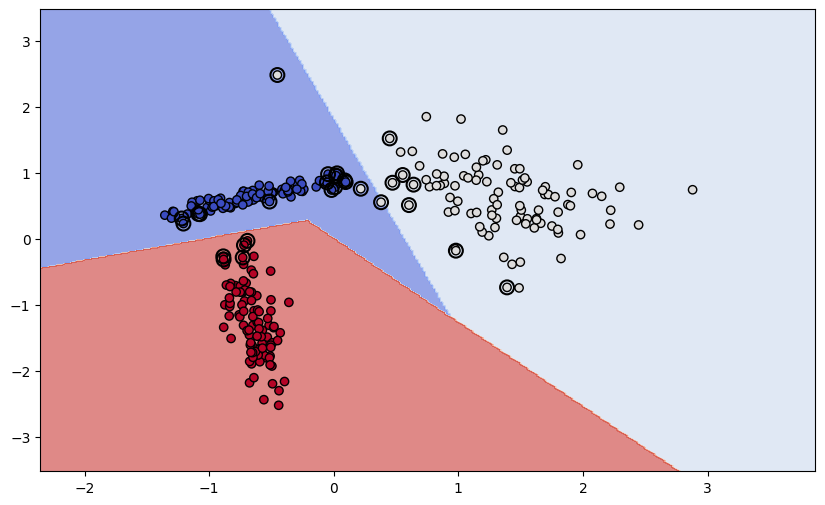

In [ ]:

from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler


X, y = make_classification(
    n_samples=300,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_classes=3,
    n_clusters_per_class=1,
    class_sep=1.5,
    random_state=42
)


scaler = StandardScaler()
X = scaler.fit_transform(X)

def plot_decision(X, y, model):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

    if hasattr(model, 'support_vectors_'):
        plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                    s=100, facecolors='none', edgecolors='k', linewidths=1.5, label='Support Vectors')



    plt.show()



Try_Test = SVC(kernel='linear').fit(X, y)
plot_decision(X, y, Try_Test)

# Выберите из библиотеки sklearn готовый датасет для классификации и попробуйте смоделировать его при помощи метода опорных векторов.

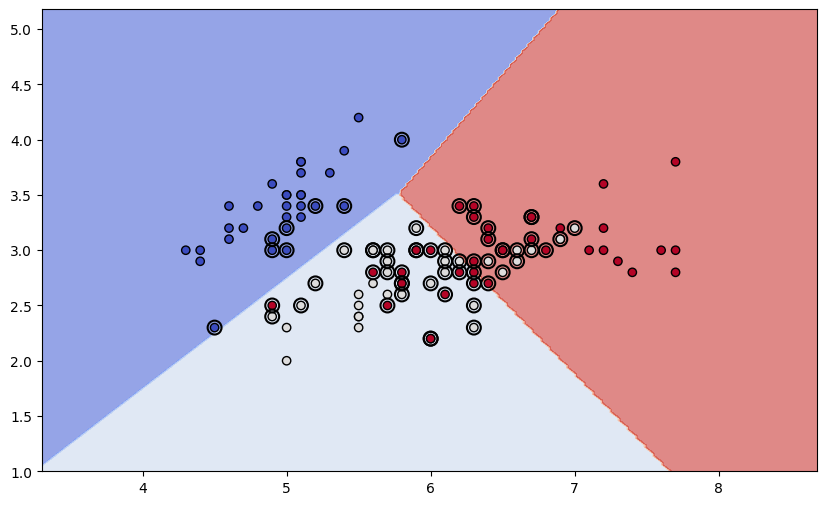

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

# Датасет Iris
iris = datasets.load_iris()
X = iris.data[:, :2]  # Используем только первые два признака для 2D-визуализации
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = SVC(kernel='linear', C=1)
model.fit(X_train, y_train)


plot_decision( X_train, y_train, model )


# Повторите такой же анализ для задачи регрессии и соответствующего датасета.

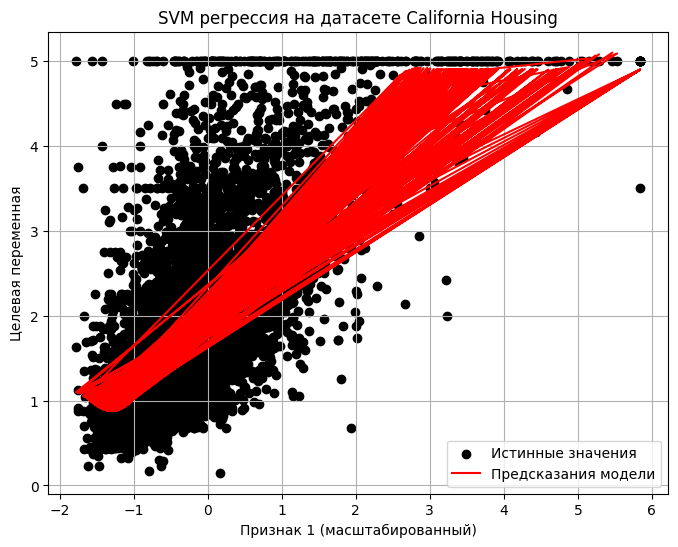

Точность модели на тестовых данных: 0.457


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# 1. Загрузка датасета California Housing
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X = data.data[:, :1]  # Мы используем только первый признак для 1D-визуализации
y = data.target

# 2. Разделение данных на тренировочную и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Обучение модели SVR
svr = SVR(kernel='rbf', C=100, epsilon=0.1)
svr.fit(X_train_scaled, y_train)

# 5. Визуализация результата
# Строим график предсказанных значений против истинных значений
plt.figure(figsize=(8, 6))
plt.scatter(X_test_scaled, y_test, color='black', label="Истинные значения")
plt.plot(X_test_scaled, svr.predict(X_test_scaled), color='red', label="Предсказания модели")
plt.title("SVM регрессия на датасете California Housing")
plt.xlabel("Признак 1 (масштабированный)")
plt.ylabel("Целевая переменная")
plt.legend()
plt.grid(True)
plt.show()

# 6. Оценка модели
score = svr.score(X_test_scaled, y_test)
print(f"Точность модели на тестовых данных: {score:.3f}")


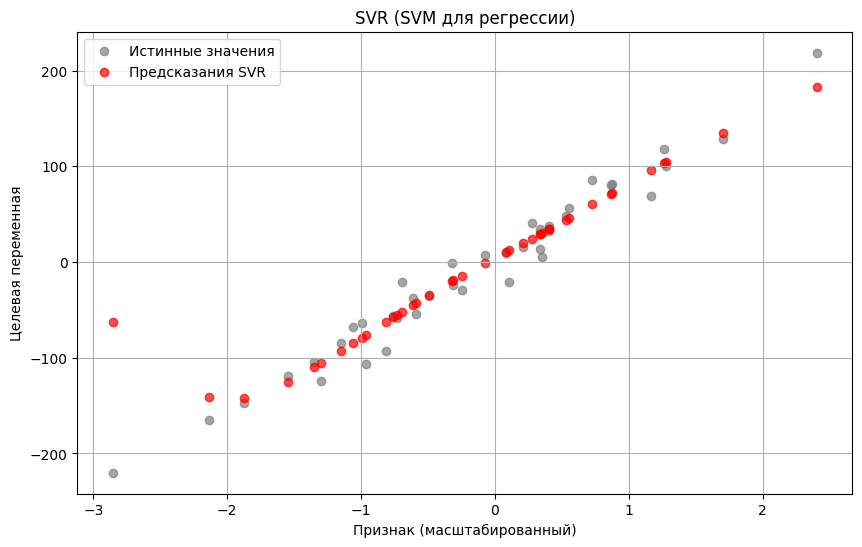

R² score на тестовых данных: 0.885


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Генерация искусственного регрессионного датасета
X, y = make_regression(n_samples=200, n_features=1, noise=15, random_state=42)

# Делим данные на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабируем признаки (SVM чувствителен к масштабу)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучаем модель SVR
model = SVR(kernel='rbf', C=100, epsilon=10)
model.fit(X_train_scaled, y_train)

# Предсказания
y_pred = model.predict(X_test_scaled)

# Визуализация
plt.figure(figsize=(10, 6))
plt.scatter(X_test_scaled, y_test, color='gray', label='Истинные значения', alpha=0.7)
plt.scatter(X_test_scaled, y_pred, color='red', label='Предсказания SVR', alpha=0.7)
plt.title("SVR (SVM для регрессии)")
plt.xlabel("Признак (масштабированный)")
plt.ylabel("Целевая переменная")
plt.legend()
plt.grid(True)
plt.show()

# Оценка модели
r2 = model.score(X_test_scaled, y_test)
print(f"R² score на тестовых данных: {r2:.3f}")


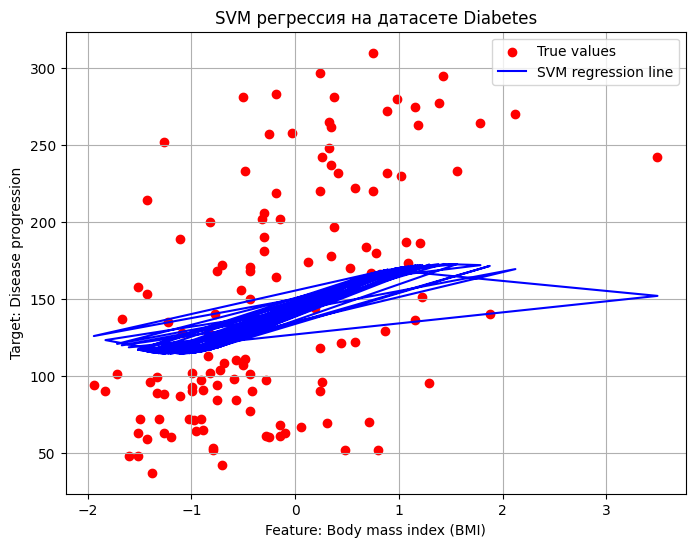

Точность модели на тестовых данных: 0.20


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# 1. Загрузка датасета Diabetes
diabetes = datasets.load_diabetes()
X = diabetes.data[:, 2:3]  # Используем только один признак для 2D-визуализации
y = diabetes.target

# 2. Разделение данных на тренировочную и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Масштабирование данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Обучение модели SVR (метод опорных векторов для регрессии)
model = SVR(kernel='rbf', C=1, epsilon=0.1)
model.fit(X_train, y_train)

# 5. Прогнозирование на тестовых данных
y_pred = model.predict(X_test)

# 6. Визуализация результатов
plt.figure(figsize=(8, 6))

# Настроим график для отображения
plt.scatter(X_test, y_test, color='red', label='True values')  # Истинные значения
plt.plot(X_test, y_pred, color='blue', label='SVM regression line')  # Линия прогноза

plt.title("SVM регрессия на датасете Diabetes")
plt.xlabel("Feature: Body mass index (BMI)")
plt.ylabel("Target: Disease progression")
plt.legend()
plt.grid(True)
plt.show()

# Оценка модели
print(f"Точность модели на тестовых данных: {model.score(X_test, y_test):.2f}")


# Задания для самостоятельного выполнения

- В первом задании поэкспериментируйте с различными значениями аргумента C класса SVC. Сделайте вывод о том, как он влияет на модель классификации.
- В первом задании подвигайте точку нового предсказания. Убедитесь, что с другой стороны границы предсказывается другой класс. Как изменяется предсказание, если точка ляжет внутрь полосы зазора?
- Во втором задании повторите анализ с методом опорных векторов с другими видами ядер. Сравните вид границы принятия решения и показатели точности модели.
- В третьем задании поэкспериментируйте со значением аргумента C. Сделайтевывод о том, как он влияет на модель.
- В третьем задании примените классификатор без ядра. Познакомьтесь и примените класс Linear_SVC.
- Сгенерируйте датасет для классификации из 1000 точек и 5 атрибутов. Попробуйте применить метод опорных векторов на нем. Найдите методом подбора наилучшее ядро и значение С.
- Попробуйте данную модель с большим количеством точек. На каком количестве обучение начинает занимать существенное время?
- Примените метод опорных векторов для задачи множественной классификации. Самостоятельно сгенерируйте визуализируемый датасет для этой задачи. Поробуйте изобразить границу принятия решений и зазор.
- Выберите из библиотеки sklearn готовый датасет для классификации и попробуйте смоделировать его при помощи метода опорных векторов.
- Повторите такой же анализ для задачи регрессии и соответствующего датасета.